<a href="https://colab.research.google.com/github/AliUrbina/Data_Science_Projects/blob/main/Retail_Store_Profitability_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Retail Store Profitability Data Analysis**

##### This project analyzes four different stores to identify the least profitable one, with the goal of closing it and retaining the more profitable locations.

The analysis includes:

🧹 Data cleaning and preprocessing using Pandas

📊 Exploratory Data Analysis (EDA) and visualization with Matplotlib

💰 Profitability and performance comparison across stores

🧠 Final recommendation supported by data insights

## **Importing Data**

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


###**Get Familiar with the Datasets**

Before we begin analyzing the information, we need to explore the data and check what type of information is included in each dataset.

In [2]:
display(tienda.head(2))
display(tienda2.head(2))
display(tienda3.head(2))
display(tienda4.head(2))


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782


In [3]:
#To obtained a total number of columns and rows
tienda.shape
tienda2.shape
tienda3.shape
tienda4.shape

(2358, 12)

## **Analysis**

###1.  Calculate the individual income for each store and the overall total across all four stores.

In [4]:
#Store the total income for each store in a variable
income1 = tienda["Precio"].sum()
income2 = tienda2["Precio"].sum()
income3 = tienda3["Precio"].sum()
income4 = tienda4["Precio"].sum()

In [5]:
#Creating a dictionary with store names as keys and their incomes as values
incomes = {
    "Store 1": income1,
    "Store 2": income2,
    "Store 3": income3,
    "Store 4": income4,
}

for key, val in incomes.items(): #using .items method to print both key and value
    print(f"{key}: ${val:,.2f}\n") #The \n is to have space between each line)

print(f"The total income for all the stores is: ${sum(incomes.values()):,.2f}")

Store 1: $1,150,880,400.00

Store 2: $1,116,343,500.00

Store 3: $1,098,019,600.00

Store 4: $1,038,375,700.00

The total income for all the stores is: $4,403,619,200.00


###2. Calculate how many products were sold per category in each store

In [6]:
from numpy._core.defchararray import count
#total products in general sold per store in a variable
products1 = tienda.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
products2 = tienda2.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
products3 = tienda3.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
products4 = tienda4.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)


In [7]:
stores = [products1, products2, products3, products4]

for i, df in enumerate(stores, start=1):
  print(f"\n Store{i} ")
  print(df)


 Store1 
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64

 Store2 
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64

 Store3 
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int64

 Store4 
Categoría del Producto
Muebles                    480
Electr

In [8]:
total_per_category = (products1+products2+products3+products4)
print(total_per_category.sort_values(ascending=False))

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: Producto, dtype: int64


In [9]:
#New dataframe created with all the stores in one variable
all_stores = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [10]:
#Calculate the average per categorie
all_stores.groupby("Categoría del Producto")["Calificación"].mean().sort_values(ascending=False).round(3)

,Calificación
Categoría del Producto,
Juguetes,4.071
Muebles,4.034
Electrodomésticos,4.015
Libros,4.004
Instrumentos musicales,4.004
Electrónicos,3.993
Deportes y diversión,3.988
Artículos para el hogar,3.979


###3. Calculate the average rating given for clients

In [11]:
#Calculate rate per store
stores = [tienda, tienda2,tienda3, tienda4]

for i, df in enumerate(stores, start=1):
  avg = df["Calificación"].mean()
  print(f"Store {i}, average rate {avg:.2f}")

Store 1, average rate 3.98
Store 2, average rate 4.04
Store 3, average rate 4.05
Store 4, average rate 4.00


###4. Best-selling and least-selling products

In [14]:
#total products in specific sold per store in a variable
items1 = tienda.groupby("Producto")["Producto"].count().sort_values(ascending=False)
items2 = tienda2.groupby("Producto")["Producto"].count().sort_values(ascending=False)
items3 = tienda3.groupby("Producto")["Producto"].count().sort_values(ascending=False)
items4 = tienda4.groupby("Producto")["Producto"].count().sort_values(ascending=False)

In [16]:
BS_LS = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
  counts =df["Producto"].value_counts()

  best = counts.max()
  less = counts.min()

 #---------------Filter the pandas series- index: taking the product name into a python list
  best_products = counts[counts == best].index.tolist()
  less_products = counts[counts == less].index.tolist()

  print(f"\n Store{i} ")
  print(f"The most selling products are ({best}): {", ".join(best_products)}")
  print(f"The less selling prodcuts are ({less}): {", ".join(less_products)}")

#we save everything in our variable and each i generates a dictionary with the results we want
  BS_LS.append({
    "Store": f"Store {i}",
    "Best Products": ", ".join(best_products), #.join to convert a list separated for commas
    "Top units": best,
    "Less Products": ", ".join(less_products),
    "less units": less
  })


 Store1 
The most selling products are (60): Microondas, TV LED UHD 4K, Armario
The less selling prodcuts are (33): Auriculares con micrófono, Celular ABXY

 Store2 
The most selling products are (65): Iniciando en programación
The less selling prodcuts are (32): Juego de mesa

 Store3 
The most selling products are (57): Kit de bancas
The less selling prodcuts are (35): Bloques de construcción

 Store4 
The most selling products are (62): Cama box
The less selling prodcuts are (33): Guitarra eléctrica


###5. Calculate the average shipment cost for each store

In [31]:
stores_df = [tienda, tienda2, tienda3, tienda4]

for i, sh in enumerate(stores_df, start=1):
  sh_avg = sh["Costo de envío"].mean()
  print(f"Store {i}, average shipping cost: ${sh_avg: ,.2f}")

Store 1, average shipping cost: $ 26,018.61
Store 2, average shipping cost: $ 25,216.24
Store 3, average shipping cost: $ 24,805.68
Store 4, average shipping cost: $ 23,459.46


##**Visualization**

There's only about a 10% variation in Store 4’s income, but overall, the difference isn't significant.

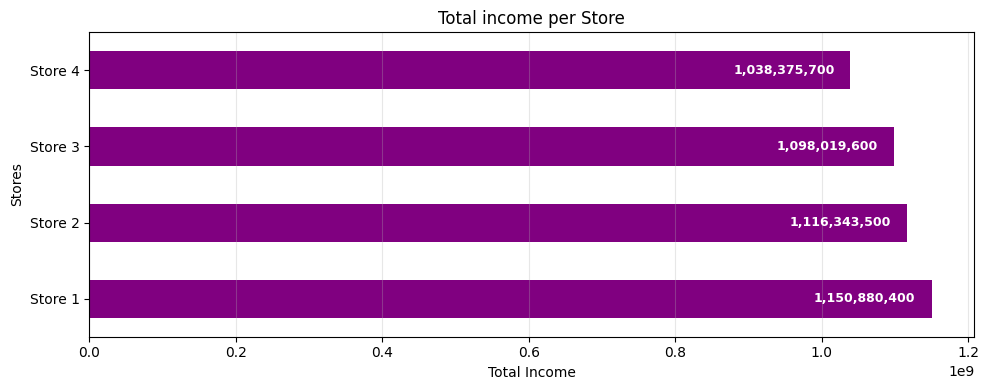

In [60]:
import matplotlib.pyplot as plt


#creating a dataframe with the 2 lists
income_df = pd.DataFrame({
    "Store": stores,
    "Total Income":values
})

#Creating the graphics
ax = income_df.plot(
    kind="barh",
    x="Store",
    y="Total Income",
    color= "purple",
    figsize=(10,4),
    legend=False
)

plt.title("Total income per Store")
plt.xlabel("Total Income")
plt.ylabel("Stores")
plt.grid(axis="x", alpha=0.3)

#Adding the information into the bars

for p in ax.patches:
  width = p.get_width()
  ax.text(
      width - (width * 0.02), #small margin in the left
      p.get_y() + p.get_height()/2,
      f"{width:,.0f}",
      va="center",
      ha="right",
      color="white",
      fontsize=9,
      fontweight="bold"
  )

plt.tight_layout()
plt.show()

Rates per Store

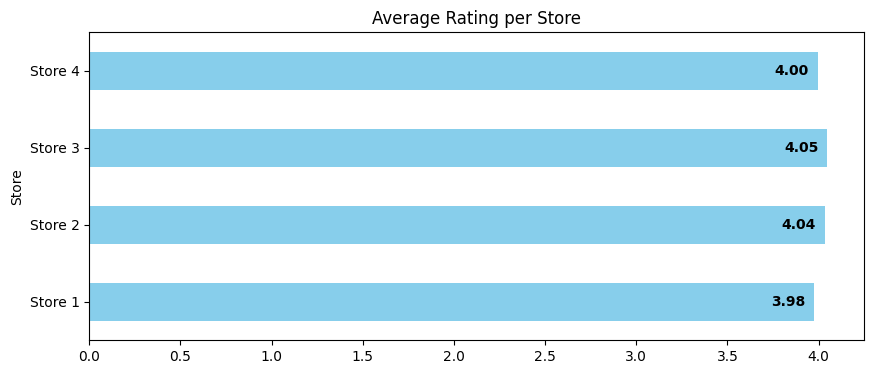

In [66]:
# Calcular y graficar promedio de calificación por tienda en una sola línea
rt = pd.DataFrame({
    "Store": ["Store 1", "Store 2", "Store 3", "Store 4"],
    "Average Rating": [t["Calificación"].mean() for t in [tienda, tienda2, tienda3, tienda4]]
}).plot(kind="barh", x="Store", y="Average Rating", color="skyblue", figsize=(10,4), legend=False, title="Average Rating per Store")


#write the rates inside the bars
for p in rt.patches:
  rt.text(
      p.get_width() -.05,
      p.get_y() + p.get_height()/2,
      f"{p.get_width():.2f}",
      ha="right", va="center", color="black", fontweight="bold"
  )

  plt.tight_layout
  plt.show


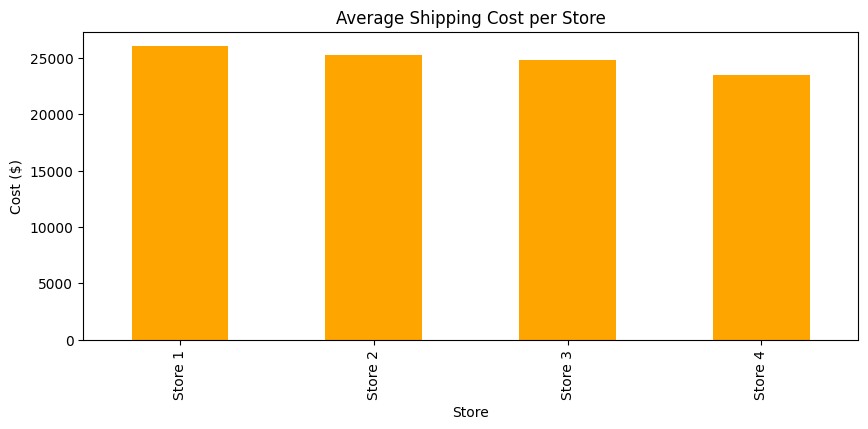

In [69]:
pd.DataFrame({
    "Store": ["Store 1", "Store 2", "Store 3", "Store 4"],
    "Average Shipping Cost": [26018.61, 25216.24, 24805.68, 23459.46]
}).plot(kind="bar", x="Store", y="Average Shipping Cost", color="orange", legend=False, figsize=(10,4), title="Average Shipping Cost per Store")
plt.ylabel("Cost ($)")
plt.show()


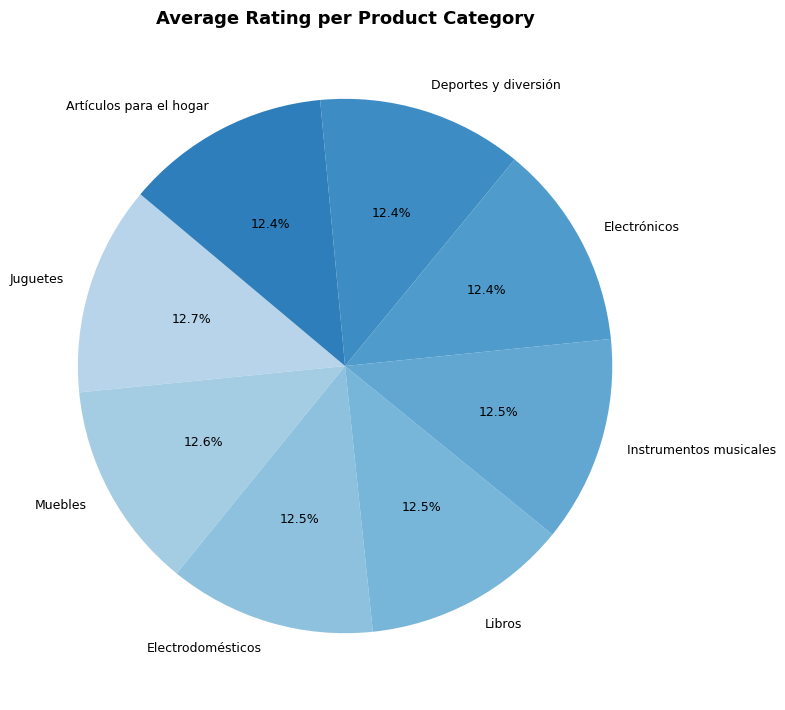

In [81]:
# Calculate average rating per product category
avg_rating_per_cat = (
    all_stores.groupby("Categoría del Producto")["Calificación"]
    .mean()
    .sort_values(ascending=False)
    .round(3)
)

# Create pie chart
from matplotlib import cm
import numpy as np

colors = cm.Blues(np.linspace(0.3, 0.7, len(avg_rating_per_cat)))

plt.figure(figsize=(8,8))
plt.pie(
    avg_rating_per_cat,
    labels=avg_rating_per_cat.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 9}
)

plt.title("Average Rating per Product Category", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()



##**Conclusion**

After analyzing sales performance, customer ratings, and operational costs across the four Alura Store locations, the data reveals a consistent level of profitability among all branches.

1. Revenue and Sales Overview
All four stores show very similar total incomes, ranging from $1.15 billion (Store 1) to $1.03 billion (Store 4), with a combined total income of over $4.4 billion.
This indicates a well-balanced sales distribution, where no single store significantly underperforms. Store 1 leads slightly in revenue, while Store 4 trails by less than 10%.

2. Product Category Performance
Across all stores, Furniture and Electronics are consistently the best-selling categories, followed by Toys and Home Appliances.
This pattern suggests that the company’s product mix is stable and customer demand is evenly distributed across locations.
The least sold categories—such as Books and Home Accessories—represent smaller portions of total sales but are still present in every store, showing consistent but niche demand.

3. Customer Satisfaction and Shipping Costs
Customer satisfaction is uniformly positive, with all stores maintaining an average rating between 3.98 and 4.05, showing steady service quality across branches.
Shipping costs are also comparable, ranging from $26,018 in Store 1 to $23,459 in Store 4, indicating minimal variation in operational expenses.

4. Best and Least Selling Products
While individual best-selling products differ by store (e.g., TV LED UHD 4K in Store 1, Programming Books in Store 2, Gym Equipment in Store 3, and Beds in Store 4), each store maintains a balance between high-volume and low-volume items.
None shows a product dependency that would pose a financial risk.

###**Recommendation**

Based on the analysis Mr Juan, **there is no strong evidence to justify closing or selling any store**.
All four locations are financially healthy, achieve similar customer satisfaction, and operate with balanced shipping and sales performance.
Instead of reducing operations, Alura Store should focus on:

*Promoting the most profitable product categories (Furniture and
Electronics).

*Investigating strategies to boost sales in lower-performing categories (Books and Home Accessories).

*Exploring ways to slightly reduce shipping costs without impacting delivery quality.